In [65]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

#plotly or other graphing library
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [66]:
csv_path = 'https://raw.githubusercontent.com/uzmabb182/Data602_Assignments/main/Final_Project_Data_602/resources/posgres_modality_df.csv'
modality_df = pd.read_csv(csv_path, encoding="utf-8")
modality_df

,countyname,fips,learning_modality,state,abbreviation,year,avg_student_count
0,Abbeville County,45001,Hybrid,South Carolina,SC,2022,5945
1,Abbeville County,45001,In Person,South Carolina,SC,2021,3828
2,Abbeville County,45001,In Person,South Carolina,SC,2022,3837
3,Acadia Parish,22001,In Person,Louisiana,LA,2021,7722
4,Acadia Parish,22001,In Person,Louisiana,LA,2022,7722
...,...,...,...,...,...,...,...
8496,Zapata County,48505,In Person,Texas,TX,2021,3549
8497,Zapata County,48505,In Person,Texas,TX,2022,3549
8498,Zavala County,48507,In Person,Texas,TX,2021,1209
8499,Zavala County,48507,In Person,Texas,TX,2022,1209


In [67]:
modality_df['learning_modality'].unique()

array(['Hybrid', 'In Person', 'Remote'], dtype=object)

In [68]:
# Remove column name 'countyname'
modality_df = modality_df.drop(['countyname', 'abbreviation'], axis=1)
modality_df

,fips,learning_modality,state,year,avg_student_count
0,45001,Hybrid,South Carolina,2022,5945
1,45001,In Person,South Carolina,2021,3828
2,45001,In Person,South Carolina,2022,3837
3,22001,In Person,Louisiana,2021,7722
4,22001,In Person,Louisiana,2022,7722
...,...,...,...,...,...
8496,48505,In Person,Texas,2021,3549
8497,48505,In Person,Texas,2022,3549
8498,48507,In Person,Texas,2021,1209
8499,48507,In Person,Texas,2022,1209


In [69]:
# Checking the missing data
modality_df.isna().sum().sort_values()

fips                 0
learning_modality    0
state                0
year                 0
avg_student_count    0
dtype: int64

In [70]:
from sklearn.preprocessing import LabelEncoder
le_learning_modality = LabelEncoder()
modality_df['learning_modality'] = le_learning_modality.fit_transform(modality_df['learning_modality'])
modality_df['learning_modality'].unique()

array([0, 1, 2])

In [71]:

le_learning_modality = LabelEncoder()
modality_df['state'] = le_learning_modality.fit_transform(modality_df['state'])
modality_df['state'].unique()

array([40, 18, 12, 15, 17, 25, 36,  5, 13, 14, 24, 27, 34, 35, 38, 47, 49,
       45, 23,  9, 33,  4, 32, 50, 46, 22,  1, 20, 16, 42, 43, 19,  2, 10,
        3, 30, 41,  0, 37, 48, 21, 44, 26, 29, 31, 39, 28,  8,  6, 11,  7])

In [72]:
# Scaling in scikit-learn
from sklearn.preprocessing import StandardScaler

X = modality_df.drop('learning_modality', axis=1).values
y = modality_df['learning_modality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(np.mean(X), np.std(X))
print(np.mean(X_train_scaled), np.std(X_train_scaled))

9358.718474297142 16435.52651352877
3.001233248850814e-14 0.9999999999999932


In [75]:
print(X.shape, y.shape)



(8501, 4) (8501,)


In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)


In [84]:
# Scaling in a pipeline
from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier(n_neighbors=6))]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(y_pred)
print(knn_scaled.score(X_test, y_test))


[1 0 1 ... 1 1 1]
0.7160493827160493


0.7160493827160493


In [85]:
# Comparing the performance using the unscaled data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

knn_unscaled = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
print(knn_unscaled.score(X_test, y_test))

0.7313345091122869


In [87]:
# Cross Validation and Scaling in a Pipeline

from sklearn.model_selection import GridSearchCV

steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

parameters = {"knn__n_neighbors": np.arange(1, 50)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)
print(y_pred)

[1 0 1 ... 1 1 1]


In [89]:
# Checking Model Parameters
# value for K
print(cv.best_score_)
print(cv.best_params_)

0.7369117647058824
{'knn__n_neighbors': 26}


### Model Complexity Curve and over/underfitting
### To plot test accuracy and train accuracy Vs K value.

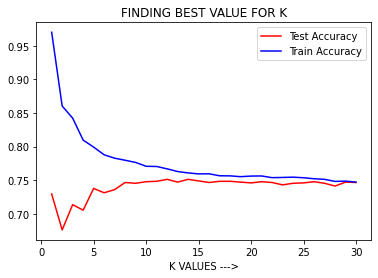

In [91]:
# To plot test accuracy and train accuracy Vs K value.
p = list(range(1, 31))
lst_test =[]
lst_train =[]
for i in p:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    z = knn.score(X_test, y_test)
    t = knn.score(X_train, y_train)
    lst_test.append(z)
    lst_train.append(t)
      
plt.plot(p, lst_test, color ='red', label ='Test Accuracy')
plt.plot(p, lst_train, color ='b', label ='Train Accuracy')
plt.xlabel('K VALUES --->')
plt.title('FINDING BEST VALUE FOR K (Number of Neighbors')
plt.legend()


### **Evaluating Classification Models**

In [92]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X = modality_df.drop('learning_modality', axis=1).values
y = modality_df['learning_modality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


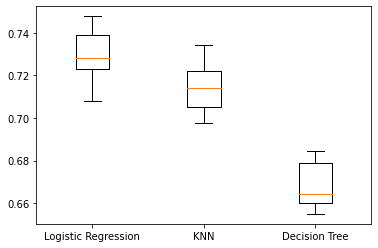

In [94]:
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), 
          "Decision Tree": DecisionTreeClassifier()}

results = []

for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

### **Test Set Performance**

In [95]:
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  test_score = model.score(X_test_scaled, y_test)
  print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 0.7119341563786008
KNN Test Set Accuracy: 0.7066431510875956
Decision Tree Test Set Accuracy: 0.6278659611992945
